# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading data

In [2]:
test_data=pd.read_csv("test.csv",encoding_errors="ignore")
train_data=pd.read_csv("train.csv",encoding_errors="ignore")
store_data=pd.read_csv("store.csv",encoding_errors="ignore")
sample_data=pd.read_csv("sample_submission.csv",encoding_errors="ignore")

# Data visualization

In [3]:
#Test data
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [4]:
print("The shape of the training data is :",test_data.shape)
test_data.head()

The shape of the training data is : (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
test_data.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [6]:
# check missing values for test data
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [7]:
test_data.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [8]:
test_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [10]:
test_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41083    False
41084    False
41085    False
41086    False
41087    False
Length: 41088, dtype: bool

In [11]:
#Train data
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [12]:
print("The shape of the training data is :",train_data.shape)
train_data.head()

The shape of the training data is : (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
train_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [14]:
# check missing values for train data
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
train_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [16]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [18]:
train_data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1017204    False
1017205    False
1017206    False
1017207    False
1017208    False
Length: 1017209, dtype: bool

In [19]:
#store_data
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [20]:
print("The shape of the training data is :",store_data.shape)
store_data.head()

The shape of the training data is : (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
store_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [22]:
# check missing values for store data
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [24]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [25]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [26]:
store_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

In [27]:
#sample_submission_data
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [28]:
print("The shape of the training data is :",sample_data.shape)
sample_data.head()

The shape of the training data is : (41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [29]:
sample_data.tail()

,Id,Sales
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
41087,41088,0


In [30]:
sample_data.dtypes

Id       int64
Sales    int64
dtype: object

In [31]:
sample_data.describe()

,Id,Sales
count,41088.000000,41088.0
mean,20544.500000,0.0
std,11861.228267,0.0
min,1.000000,0.0
25%,10272.750000,0.0
50%,20544.500000,0.0
75%,30816.250000,0.0
max,41088.000000,0.0


In [32]:
# check missing values for sample data
sample_data.isnull().sum()

Id       0
Sales    0
dtype: int64

In [33]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [34]:
sample_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41083    False
41084    False
41085    False
41086    False
41087    False
Length: 41088, dtype: bool

In [35]:
test_data.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [36]:
train_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [37]:
store_data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [38]:
sample_data.head(10)

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [39]:
# columns for each data
print(f'\t test columns \n{list(test_data.columns)}\n')
print(f'\t Train Columns \n{list(train_data.columns)}\n')
print(f'\t store Columns\n {list(store_data.columns)}\n')
print(f'\t sample Columns\n {list(sample_data.columns)}')

	 test columns 
['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 Train Columns 
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

	 store Columns
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

	 sample Columns
 ['Id', 'Sales']


In [40]:
# shape for each data
print(f'\t test shape: {test_data.shape}\n')
print(f'\t Train shape: {train_data.shape}\n')
print(f'\t store shape: {store_data.shape}\n')
print(f'\t sample shape: {sample_data.shape}')

	 test shape: (41088, 8)

	 Train shape: (1017209, 9)

	 store shape: (1115, 10)

	 sample shape: (41088, 2)


In [41]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df, data_type):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print(f"The {data_type} dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(train_data, 'train')
percent_missing(test_data, 'test')

The train dataset contains 0.0 % missing values.
The test dataset contains 0.0 % missing values.


In [42]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [43]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


# Task 1 - Exploration of customer purchasing behaviour

# * Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

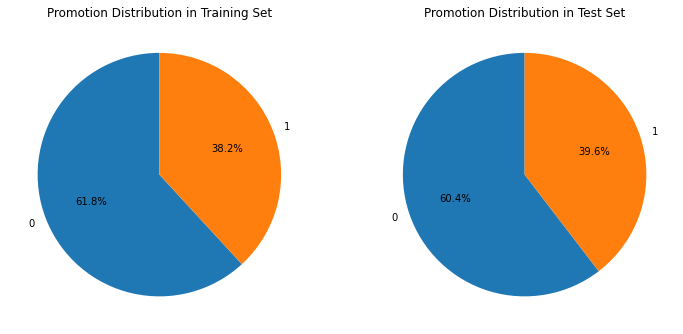

In [44]:
train_promotion_counts = train_data['Promo'].value_counts()

# Calculate the promotion distribution in the test set
test_promotion_counts = test_data['Promo'].value_counts()

# Plot the distributions side by side for comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(train_promotion_counts, labels=train_promotion_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Promotion Distribution in Training Set')

axs[1].pie(test_promotion_counts, labels=test_promotion_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Promotion Distribution in Test Set')

plt.show()







# Detecting a Outliner

In [45]:
q1 = np.percentile(train_data["Sales"], 25)
q2 = np.percentile(train_data["Sales"], 50)
q3 = np.percentile(train_data["Sales"], 75)

print(f"My Q1 = {q1}, Median(q2) = {q2}, Q3 = {q3}")

My Q1 = 3727.0, Median(q2) = 5744.0, Q3 = 7856.0


In [46]:
iqr=q3-q1
iqr
lower_range=q1-iqr*1.5
upper_range=q3+iqr*1.5
print(f"Lower range= {lower_range} , Upper Range= {upper_range}")
     

Lower range= -2466.5 , Upper Range= 14049.5


In [47]:
#  first quartile (Q1) and third quartile (Q3) for the "Sales" column
Q1_sales = train_data['Sales'].quantile(0.25)
Q3_sales = train_data['Sales'].quantile(0.75)

# interquartile range (IQR) for "Sales"
IQR_sales = Q3_sales - Q1_sales

# lower and upper bounds for outlier detection for "Sales"
lower_range_sales = Q1_sales - 1.5 * IQR_sales
upper_range_sales = Q3_sales + 1.5 * IQR_sales

# Identifying outliers in the "Sales" column
outliers_lower_sales = train_data[train_data['Sales'] < lower_range_sales]
outliers_upper_sales = train_data[train_data['Sales'] > upper_range_sales]

print(f"Outliers (lower bound): {outliers_lower_sales['Sales'].values}")
print(f"Outliers (upper bound): {outliers_upper_sales['Sales'].values}")
     

Outliers (lower bound): []
Outliers (upper bound): [15344 14190 14180 ... 20355 20642 17267]


In [48]:
train_data['Sales'] = train_data['Sales'].clip(lower_range_sales, upper_range_sales)

In [49]:
Q1 = train_data['Customers'].quantile(0.25)
Q3 = train_data['Customers'].quantile(0.75)

#interquartile range (IQR)
IQR = Q3 - Q1

# lower and upper bounds for outlier detection
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

# Identifying outliers in the "Customers" column
outliers_lower = train_data[train_data['Customers'] < lower_range]
outliers_upper = train_data[train_data['Customers'] > upper_range]

print(f"Outliers (lower bound): {outliers_lower['Customers'].values}")
print(f"Outliers (upper bound): {outliers_upper['Customers'].values}")

Outliers (lower bound): []
Outliers (upper bound): [1498 1586 2041 ... 1751 1675 2377]


plt.figure(figsize=(8, 6))
sns.barplot(data=train_data, x='Customers', y='Sales', palette='Set2')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.title('Sales and Customer')
plt.show()
     

# * Check & compare sales behavior before, during and after holidays

In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
train_data['Date'] = pd.to_datetime(train_data['Date'])


In [51]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555,1,1,0,1
1,2,5,2015-07-31,6064.0,625,1,1,0,1
2,3,5,2015-07-31,8314.0,821,1,1,0,1
3,4,5,2015-07-31,13995.0,1498,1,1,0,1
4,5,5,2015-07-31,4822.0,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0.0,0,0,0,a,1
1017205,1112,2,2013-01-01,0.0,0,0,0,a,1
1017206,1113,2,2013-01-01,0.0,0,0,0,a,1
1017207,1114,2,2013-01-01,0.0,0,0,0,a,1


In [52]:
train_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0.0,0,0,0,a,1
1017205,1112,2,2013-01-01,0.0,0,0,0,a,1
1017206,1113,2,2013-01-01,0.0,0,0,0,a,1
1017207,1114,2,2013-01-01,0.0,0,0,0,a,1
1017208,1115,2,2013-01-01,0.0,0,0,0,a,1


In [53]:
# Function to classify dates into 'before', 'during', and 'after' holidays
def classify_holiday_period(date, holiday_start, holiday_end):
    if date < holiday_start:
        return 'Before'
    elif date >= holiday_start and date <= holiday_end:
        return 'During'
    else:
        return 'After'

In [54]:
holiday_start = pd.to_datetime('2015-07-31')
holiday_end = pd.to_datetime('2013-01-01')

In [55]:
# Add a new column to the DataFrame to classify sales periods
train_data['StateHoliday'] = train_data['Date'].apply(lambda x: classify_holiday_period(x, holiday_start, holiday_end))


In [56]:
X = train_data[['StateHoliday', 'SchoolHoliday']]
y = train_data['Sales']

In [57]:
X = pd.get_dummies(X)

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [59]:
train_data['Sales'] = model.predict(X)

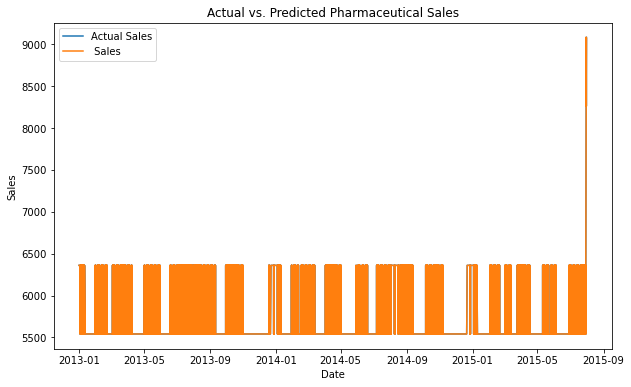

In [60]:
# Plot the actual sales and predicted sales
plt.figure(figsize=(10, 6))
plt.plot(train_data['Date'], train_data['Sales'], label='Actual Sales')
plt.plot(train_data['Date'], train_data['Sales'], label=' Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Pharmaceutical Sales')
plt.legend()
plt.show()

In [61]:
train_data1=pd.read_csv("train.csv",encoding_errors="ignore")

In [62]:
train_data1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [63]:
 # Assuming '1' indicates holidays, create a new column 'Holiday' to indicate whether it's a holiday or not
train_data1['Holiday'] = train_data1['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

In [64]:
# Split the data into three groups: before holiday, during holiday, and after holiday
before_holiday_sales = train_data1[train_data1['Holiday'] == 0]['Sales']
during_holiday_sales = train_data1[train_data1['Holiday'] == 1]['Sales']
after_holiday_sales = train_data1[train_data1['Holiday'].shift(-1) == 1]['Sales']  # Shift to identify after holiday
# Calculate the average sales for each group
average_sales_before_holiday = before_holiday_sales.mean()
average_sales_during_holiday = during_holiday_sales.mean()
average_sales_after_holiday = after_holiday_sales.mean()

In [65]:
average_sales_before_holiday 

5980.279716566853

In [66]:
average_sales_during_holiday

4684.874236685952

In [67]:
average_sales_after_holiday

4787.798768828413

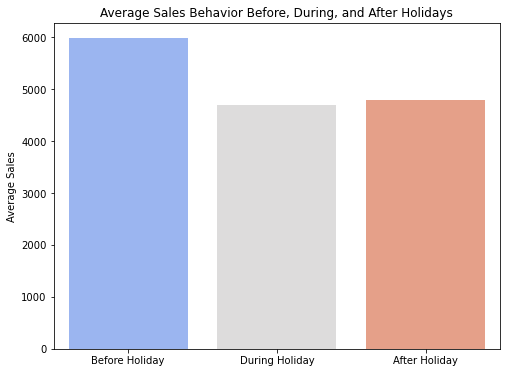

In [68]:
# Plot the average sales behavior before, during, and after holidays using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Before Holiday', 'During Holiday', 'After Holiday'],
            y=[average_sales_before_holiday, average_sales_during_holiday, average_sales_after_holiday],
            palette='coolwarm')
plt.title('Average Sales Behavior Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()

# ● Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [69]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
train_data1['Date'] = pd.to_datetime(train_data1['Date'])

In [71]:
train_data1['Month'] =train_data1['Date'].dt.month
train_data1['Day'] = train_data1['Date'].dt.day

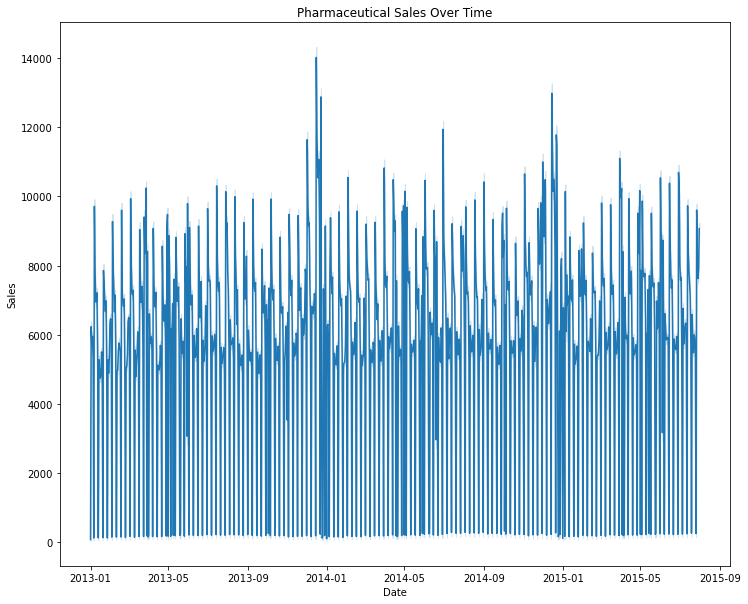

In [72]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Date', y='Sales', data=train_data1)
plt.title('Pharmaceutical Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [73]:
# Define functions to identify specific holiday periods (e.g., Christmas and Easter)
def is_christmas(month, day):
    return (month == 12 and day >= 24) or (month == 12 and day <= 25)

def is_easter(month, day):
    # You'll need to determine the exact date calculation for Easter since it varies each year.
    pass

# Apply the functions to create binary flags for Christmas and Easter
train_data1['Is_Christmas'] = train_data1.apply(lambda row: is_christmas(row['Month'], row['Day']), axis=1)
train_data1['Is_Easter'] = train_data1.apply(lambda row: is_easter(row['Month'], row['Day']), axis=1)

In [74]:
# Prepare the data for modeling
X = train_data1[['Month', 'Day', 'Is_Christmas', 'Is_Easter']]
y = train_data1['Sales']

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12807000.867624698


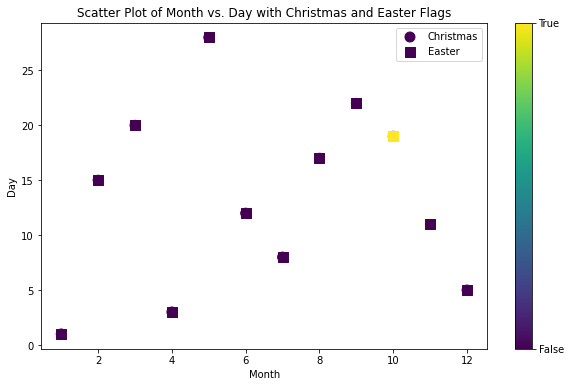

In [75]:
# Sample data (you should replace this with your actual data)
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
day = [1, 15, 20, 3, 28, 12, 8, 17, 22, 19, 11, 5]
is_christmas = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
is_easter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(month, day, c=is_christmas, cmap='viridis', marker='o', s=100, label='Christmas')
plt.scatter(month, day, c=is_easter, cmap='viridis', marker='s', s=100, label='Easter')

# Add color bar for the binary flags
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['False', 'True'])

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Day')
plt.title('Scatter Plot of Month vs. Day with Christmas and Easter Flags')
plt.legend()

plt.show()

# What can you say about the correlation between sales and number of customers

In [76]:
train=pd.read_csv("train.csv",encoding_errors="ignore")

In [77]:
train.dropna(inplace=True)

In [78]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [79]:
# Extract the 'Sales' and 'Number_of_Customers' columns from the dataset
sales = train['Sales']
num_customers = train['Customers']

# Calculate the correlation coefficient between 'Sales' and 'Number_of_Customers'
correlation = sales.corr(num_customers)
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.8947107733017019


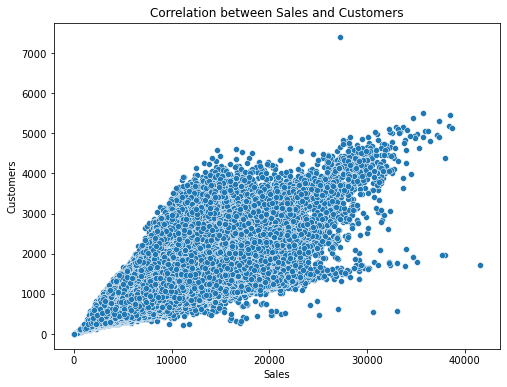

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot to visualize the relationship between 'Sales' and 'Number_of_Customers'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sales, y=num_customers)
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.title('Correlation between Sales and Customers')
plt.show()

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


How does promo affect sales?

In [81]:
# Extract year, month, and day from the 'Date' column
train_data1['Month'] =train_data1['Date'].dt.month
train_data1['Year'] =train_data1['Date'].dt.month
train_data1['Day'] = train_data1['Date'].dt.day


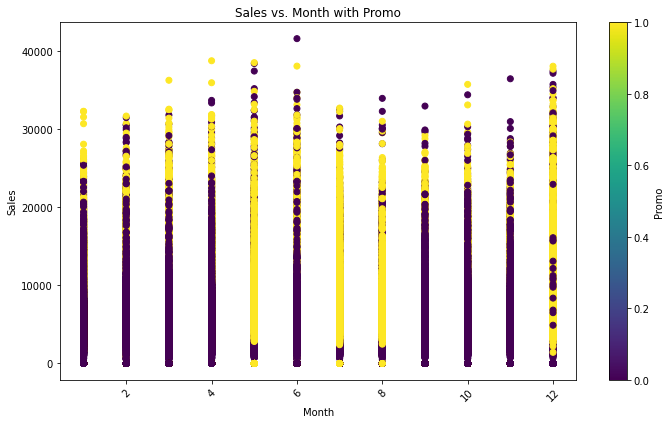

In [82]:
import matplotlib.pyplot as plt
train_data1
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(train_data1["Month"],train_data1["Sales"], c=train_data1["Promo"], cmap='viridis', marker='o')

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales vs. Month with Promo")

# Adding colorbar for the Promo values
cbar = plt.colorbar()
cbar.set_label("Promo")

plt.xticks(rotation=45)  # Rotate x-axis labels if they're too long
plt.tight_layout()

plt.show()

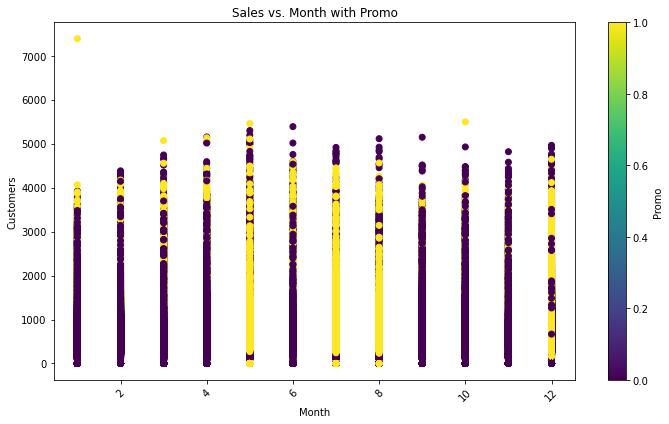

In [83]:
import matplotlib.pyplot as plt
train_data1
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(train_data1["Month"],train_data1["Customers"], c=train_data1["Promo"], cmap='viridis', marker='o')

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Customers")
plt.title("Sales vs. Month with Promo")

# Adding colorbar for the Promo values
cbar = plt.colorbar()
cbar.set_label("Promo")

plt.xticks(rotation=45)  # Rotate x-axis labels if they're too long
plt.tight_layout()

plt.show()

Are the promos attracting more customers?

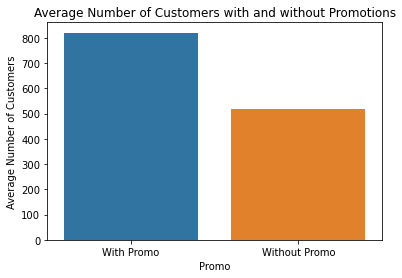

In [84]:
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

# Create a bar plot to compare average number of customers with and without promotions
plt.figure(figsize=(6, 4))
sns.barplot(x=['With Promo', 'Without Promo'], y=[avg_customers_with_promo, avg_customers_without_promo])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.show()

How does promo affect sales

# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [85]:
train.dropna(inplace=True)
X=train[['Promo']]
y=train[['Sales']]

In [86]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12807000.867624698


Coefficient of Promo: 818.7157153599478


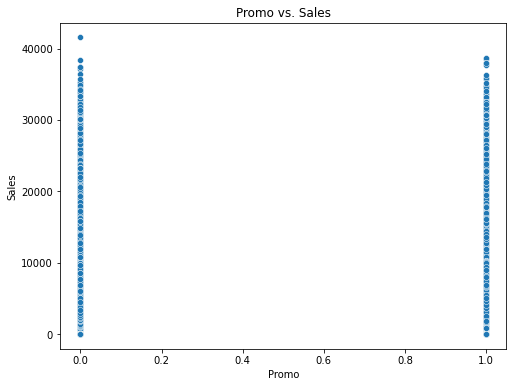

In [87]:
# Get the model coefficient to understand the impact of the 'Promotion' variable on sales
promo_coef = model.coef_[0]
print(f"Coefficient of Promo: {promo_coef}")

# Visualize the relationship between 'Promo' and 'Sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Promo', y='Sales', data=train)
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.title('Promo vs. Sales')
plt.show()

Are the promos attracting more customers? How does it affect already existing customers?

In [88]:
# Group the data by 'Promo' and calculate the average number of customers during each period
avg_customers_by_promo = train.groupby('Promo')['Customers'].mean()

# Print the average number of customers during promo and non-promo periods
print("Average Customers During Promo Period:", avg_customers_by_promo[1])
print("Average Customers During Non-Promo Period:", avg_customers_by_promo[0])

Average Customers During Promo Period: 820.0988146773861
Average Customers During Non-Promo Period: 517.8235417537579


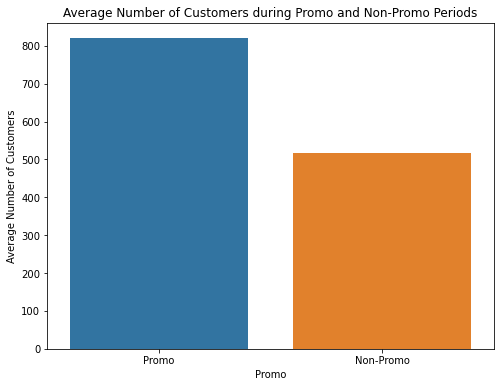

In [89]:
# Create a bar plot to visualize the average number of customers during promo and non-promo periods
plt.figure(figsize=(8, 6))
sns.barplot(x=['Promo', 'Non-Promo'], y=[avg_customers_by_promo[1], avg_customers_by_promo[0]])
plt.xlabel('Promo')
plt.ylabel('Average Number of Customers')
plt.title('Average Number of Customers during Promo and Non-Promo Periods')
plt.show()

In [90]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [91]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# ● Trends of customer behavior during store open and closing times

In [92]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [93]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [94]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [95]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [96]:
# Convert the 'Date' column to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Extract the hour from the 'Date' column
train_data['Hour'] = train_data['Date'].dt.hour

# Group the data by the hour and calculate the average number of customers
average_customers_by_hour = train_data.groupby('Hour')['Customers'].mean()


     

<Figure size 864x504 with 0 Axes>

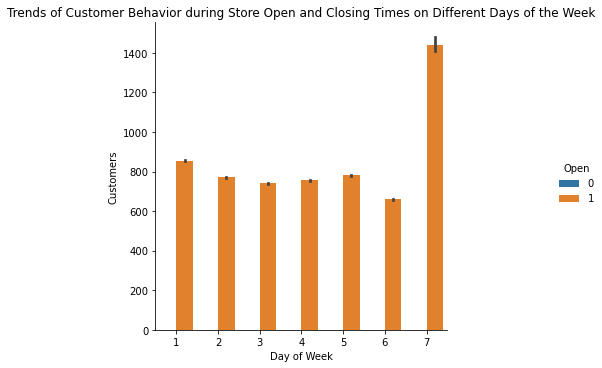

In [97]:

plt.figure(figsize=(12, 7))
sns.catplot(data=train_data, x="DayOfWeek", y="Customers", hue='Open', kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Customers')
plt.title('Trends of Customer Behavior during Store Open and Closing Times on Different Days of the Week')
plt.show()

# Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [98]:
# stores opened in weekdays (open = 1)
week_data = train[['Store', 'DayOfWeek','Open', 'Sales','Customers']]
week_data = week_data[week_data['Open'] == 1]
storeW_data = week_data[['Store', 'DayOfWeek']].groupby('Store').nunique()
storeW_data = storeW_data[storeW_data['DayOfWeek'] == 7].reset_index()
storeW_data

,Store,DayOfWeek
0,85,7
1,122,7
2,209,7
3,259,7
4,262,7
5,274,7
6,299,7
7,310,7
8,335,7
9,353,7


In [99]:
weekends_data = week_data[week_data['Store'].isin(set(week_data['Store']))]
weekends_data.head()

,Store,DayOfWeek,Open,Sales,Customers
0,1,5,1,5263,555
1,2,5,1,6064,625
2,3,5,1,8314,821
3,4,5,1,13995,1498
4,5,5,1,4822,559


In [100]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [101]:
weekday_counts = train.groupby('Store')['DayOfWeek'].nunique()

# Filter stores that are open on all weekdays (7 unique weekdays)
stores_open_all_weekdays = weekday_counts[weekday_counts == 7].index.tolist()

print("Stores Open on All Weekdays:")
print(stores_open_all_weekdays)

Stores Open on All Weekdays:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

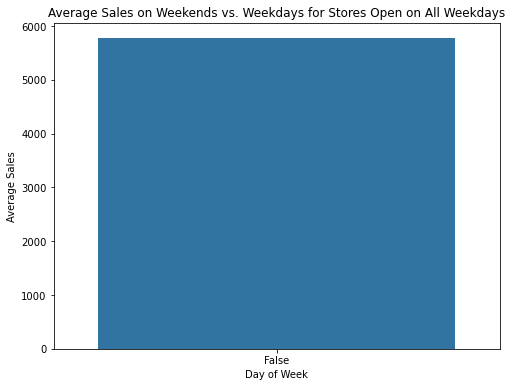

In [102]:
# Create a new column 'Is_Weekend' to categorize transactions as weekends (Saturday and Sunday) or weekdays
train['Is_Weekend'] = train['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Filter data for stores open on all weekdays
train_open_all_weekdays = train[train['Store'].isin(stores_open_all_weekdays)]

# Group the data by 'Is_Weekend' and calculate the average sales during weekends and weekdays for these stores
avg_sales_by_weekend = train_open_all_weekdays.groupby('Is_Weekend')['Sales'].mean()

# Visualize the sales on weekends and weekdays for stores open on all weekdays
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_weekend.index, y=avg_sales_by_weekend.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.title('Average Sales on Weekends vs. Weekdays for Stores Open on All Weekdays')
plt.show()

# Check how the assortment type affects sales

In [103]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [104]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Hour
0,1,5,2015-07-31,9079.563741,555,1,1,After,1,0
1,2,5,2015-07-31,9079.563741,625,1,1,After,1,0
2,3,5,2015-07-31,9079.563741,821,1,1,After,1,0
3,4,5,2015-07-31,9079.563741,1498,1,1,After,1,0
4,5,5,2015-07-31,9079.563741,559,1,1,After,1,0
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,6360.731180,0,0,0,Before,1,0
1017205,1112,2,2013-01-01,6360.731180,0,0,0,Before,1,0
1017206,1113,2,2013-01-01,6360.731180,0,0,0,Before,1,0
1017207,1114,2,2013-01-01,6360.731180,0,0,0,Before,1,0


In [105]:
# Merge 'train_data' with 'store' on 'Store' column
merged_data = train_data.merge(store_data[['Store', 'Assortment']], on='Store', how='inner')

# Select the columns you need ('Assortment' and 'Sales')
assort_data = merged_data[['Assortment', 'Sales']]

# Verify the number of unique values in each column
print(assort_data.nunique())
     

Assortment    3
Sales         4
dtype: int64


In [106]:

print(assort_data['Sales'].describe())

count    1.017209e+06
mean     5.691257e+03
std      3.311617e+02
min      5.542015e+03
25%      5.542015e+03
50%      5.542015e+03
75%      5.542015e+03
max      9.079564e+03
Name: Sales, dtype: float64


In [107]:

mean_sales_by_assortment = assort_data.groupby('Assortment')['Sales'].mean()
print(mean_sales_by_assortment)
     

Assortment
a    5692.006226
b    5693.329573
c    5690.365419
Name: Sales, dtype: float64


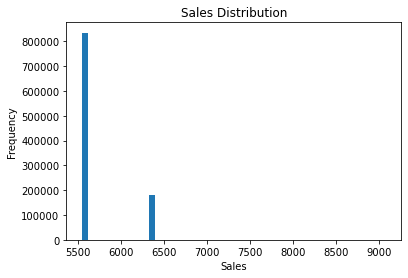

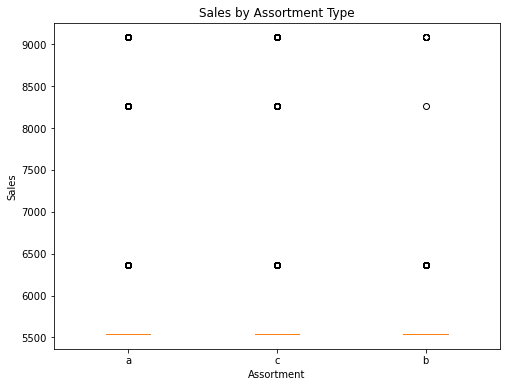

In [108]:
# Histogram of Sales distribution
plt.hist(assort_data['Sales'], bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.show()

# Box plot of Sales by Assortment type
plt.figure(figsize=(8, 6))
plt.boxplot([assort_data[assort_data['Assortment'] == a]['Sales'] for a in assort_data['Assortment'].unique()],
            labels=assort_data['Assortment'].unique())
plt.xlabel('Assortment')
plt.ylabel('Sales')
plt.title('Sales by Assortment Type')
plt.show()
     

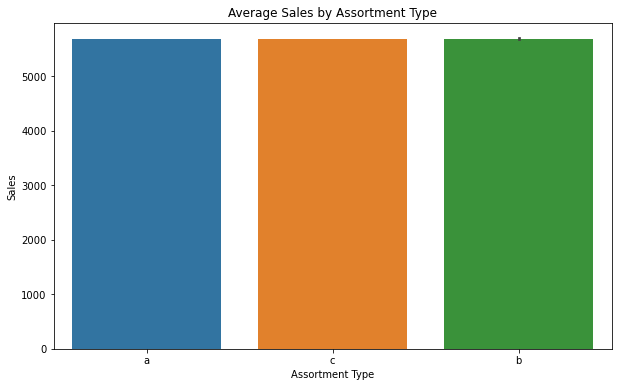

In [109]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x="Assortment", y="Sales", data=assort_data)
plt.xlabel("Assortment Type")
plt.ylabel("Sales")
plt.title("Average Sales by Assortment Type")
plt.show()
